In [3]:
import pandas as pd
import sqlite3 

In [4]:
im_conn=sqlite3.connect('../data/im.db')

In [5]:
bom_df = pd.read_csv("../zippedData/bom.movie_gross.csv.gz")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
movieinfo_df = pd.read_csv("../zippedData/rt.movie_info.tsv.gz", sep='\t', compression='gzip')
movieinfo_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
reviews_df = pd.read_csv(
    "../zippedData/rt.reviews.tsv.gz",
    sep='\t',
    compression='gzip',
    encoding='latin1'   # or encoding='ISO-8859-1'
)
reviews_df.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
tmdb_df = pd.read_csv("../zippedData/tmdb.movies.csv.gz")
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
budgets_df = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


basic cleaning

In [10]:
# check shape and missing values for all datasets

datasets = {
    "BOM": bom_df,
    "Movie Info": movieinfo_df,
    "Reviews": reviews_df,
    "TMDB": tmdb_df,
    "Budgets": budgets_df
}

for name, df in datasets.items():
    print(f"\n{name} dataset: {df.shape[0]} rows, {df.shape[1]} columns")
    print("Missing values summary:")
    display(df.isnull().sum().sort_values(ascending=True).head(10))



BOM dataset: 3387 rows, 5 columns
Missing values summary:


title                0
year                 0
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64


Movie Info dataset: 1560 rows, 12 columns
Missing values summary:


id                 0
rating             3
genre              8
runtime           30
synopsis          62
director         199
theater_date     359
dvd_date         359
writer           449
studio          1066
dtype: int64


Reviews dataset: 54432 rows, 8 columns
Missing values summary:


id                0
fresh             0
top_critic        0
date              0
publisher       309
critic         2722
review         5563
rating        13517
dtype: int64


TMDB dataset: 26517 rows, 10 columns
Missing values summary:


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


Budgets dataset: 5782 rows, 6 columns
Missing values summary:


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [11]:
#drop duplicates

for name, df in datasets.items():
    df.drop_duplicates(inplace=True)


In [12]:
# this helps you identify if numeric columns like budgets or grosses are stored as text

for name, df in datasets.items():
    display(df.dtypes)



title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher     object
date          object
dtype: object

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [13]:
# Remove $ and commas, convert to integer

for col in ["production_budget", "domestic_gross", "worldwide_gross"]:
    budgets_df[col] = (budgets_df[col].replace('[\$,]', '', regex=True).astype(float))

budgets_df[["production_budget", "domestic_gross", "worldwide_gross"]].head()


,production_budget,domestic_gross,worldwide_gross
0,425000000.0,760507625.0,2.776345e+09
1,410600000.0,241063875.0,1.045664e+09
2,350000000.0,42762350.0,1.497624e+08
3,330600000.0,459005868.0,1.403014e+09
4,317000000.0,620181382.0,1.316722e+09


In [14]:
# Make column names consistent across datasets; all lowercase, no spaces.

bom_df.columns = bom_df.columns.str.lower().str.replace(" ", "_")

movieinfo_df.columns = movieinfo_df.columns.str.lower().str.replace(" ", "_")

reviews_df.columns = reviews_df.columns.str.lower().str.replace(" ", "_")

tmdb_df.columns = tmdb_df.columns.str.lower().str.replace(" ", "_")

budgets_df.columns = budgets_df.columns.str.lower().str.replace(" ", "_")



In [15]:
# Create a new database (or connect if exists)
conn = sqlite3.connect("../data/movies_cleaned.db")

# Save each dataframe as a SQL table

bom_df.to_sql("bom_gross", conn, if_exists="replace", index=False)

movieinfo_df.to_sql("rt_movie_info", conn, if_exists="replace", index=False)

reviews_df.to_sql("rt_reviews", conn, if_exists="replace", index=False)

tmdb_df.to_sql("tmdb_movies", conn, if_exists="replace", index=False)

budgets_df.to_sql("movie_budgets", conn, if_exists="replace", index=False)

print("Cleaned datasets loaded into SQLite database successfully!")


Cleaned datasets loaded into SQLite database successfully!


In [16]:
# verification of tables in SQLite

pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,bom_gross
1,rt_movie_info
2,rt_reviews
3,tmdb_movies
4,movie_budgets


In [17]:
pd.read_sql("PRAGMA table_info(rt_movie_info);", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,synopsis,TEXT,0,None,0
2,2,rating,TEXT,0,None,0
3,3,genre,TEXT,0,None,0
4,4,director,TEXT,0,None,0
5,5,writer,TEXT,0,None,0
6,6,theater_date,TEXT,0,None,0
7,7,dvd_date,TEXT,0,None,0
8,8,currency,TEXT,0,None,0
9,9,box_office,TEXT,0,None,0


In [18]:
for table in ["bom_gross", "rt_reviews", "tmdb_movies", "movie_budgets"]:
    print(f"\n{table} columns:")
    display(pd.read_sql(f"PRAGMA table_info({table});", conn))



bom_gross columns:


,cid,name,type,notnull,dflt_value,pk
0,0,title,TEXT,0,None,0
1,1,studio,TEXT,0,None,0
2,2,domestic_gross,REAL,0,None,0
3,3,foreign_gross,TEXT,0,None,0
4,4,year,INTEGER,0,None,0



rt_reviews columns:


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,review,TEXT,0,None,0
2,2,rating,TEXT,0,None,0
3,3,fresh,TEXT,0,None,0
4,4,critic,TEXT,0,None,0
5,5,top_critic,INTEGER,0,None,0
6,6,publisher,TEXT,0,None,0
7,7,date,TEXT,0,None,0



tmdb_movies columns:


,cid,name,type,notnull,dflt_value,pk
0,0,unnamed:_0,INTEGER,0,None,0
1,1,genre_ids,TEXT,0,None,0
2,2,id,INTEGER,0,None,0
3,3,original_language,TEXT,0,None,0
4,4,original_title,TEXT,0,None,0
5,5,popularity,REAL,0,None,0
6,6,release_date,TEXT,0,None,0
7,7,title,TEXT,0,None,0
8,8,vote_average,REAL,0,None,0
9,9,vote_count,INTEGER,0,None,0



movie_budgets columns:


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,release_date,TEXT,0,None,0
2,2,movie,TEXT,0,None,0
3,3,production_budget,REAL,0,None,0
4,4,domestic_gross,REAL,0,None,0
5,5,worldwide_gross,REAL,0,None,0


OBJECTIVE 1: Identify High-Performing Studios & Genres

We start by finding which studios consistently produce the highest grossing movies. 
 
The `bom_gross` and `movie_budgets` tables are used here.

In [19]:
query_studio_performance = """
SELECT
    bg.studio,
    ROUND(AVG(mb.worldwide_gross), 2) AS avg_worldwide_gross,
    COUNT(mb.movie) AS num_movies
FROM movie_budgets mb
JOIN bom_gross bg
    ON mb.movie = bg.title
GROUP BY bg.studio
HAVING num_movies > 3
ORDER BY avg_worldwide_gross DESC
LIMIT 10;
"""

studio_performance_df = pd.read_sql(query_studio_performance, conn)
studio_performance_df


,studio,avg_worldwide_gross,num_movies
0,P/DW,5.078028e+08,10
1,BV,4.623058e+08,72
2,Fox,2.435983e+08,110
3,Sony,2.378623e+08,74
4,Uni.,2.335837e+08,117
5,WB (NL),2.308342e+08,37
6,WB,2.175864e+08,102
7,Par.,1.951109e+08,74
8,LG/S,1.230944e+08,31
9,Sum.,1.198865e+08,12


OBJECTIVE 2: Analyzing ROI (Profitability)

This calculate each movie’s ROI to identify which films and studios achieve the best returns.

In [20]:
query_roi = """
SELECT
    mb.movie,
    bg.studio,
    ROUND((mb.worldwide_gross - mb.production_budget) / mb.production_budget, 2) AS ROI,
    mb.worldwide_gross,
    mb.production_budget
FROM movie_budgets mb
JOIN bom_gross bg
    ON mb.movie = bg.title
WHERE mb.production_budget > 0
ORDER BY ROI DESC
LIMIT 10;
"""

roi_df = pd.read_sql(query_roi, conn)
roi_df


,movie,studio,ROI,worldwide_gross,production_budget
0,The Gallows,WB (NL),415.56,41656474.0,100000.0
1,The Devil Inside,Par.,100.76,101759490.0,1000000.0
2,Insidious,FD,65.58,99870886.0,1500000.0
3,Unfriended,Uni.,63.36,64364198.0,1000000.0
4,Paranormal Activity 2,Par.,58.17,177512032.0,3000000.0
5,Split,Uni.,54.79,278964806.0,5000000.0
6,Get Out,Uni.,50.07,255367951.0,5000000.0
7,Chernobyl Diaries,WB,41.41,42411721.0,1000000.0
8,Paranormal Activity 3,Par.,40.41,207039844.0,5000000.0
9,Annabelle,WB (NL),38.52,256862920.0,6500000.0


OBJECTIVE 3: Audience Ratings and Popularity

This shows which genres and types of films receive high audience ratings and votes using TMDb data.


In [21]:
query_ratings = """
SELECT
    rmi.genre AS genre,
    ROUND(AVG(tm.vote_average), 2) AS avg_rating,
    COUNT(*) AS num_movies
FROM tmdb_movies tm
JOIN movie_budgets mb
    ON tm.title = mb.movie
JOIN rt_movie_info rmi
    ON rmi.studio = mb.movie OR rmi.genre IS NOT NULL
GROUP BY rmi.genre
HAVING num_movies > 5
ORDER BY avg_rating DESC
LIMIT 10;
"""

ratings_df = pd.read_sql(query_ratings, conn)
ratings_df


,genre,avg_rating,num_movies
0,Western,6.2,11925
1,Special Interest|Sports and Fitness,6.2,2385
2,Special Interest,6.2,2385
3,Science Fiction and Fantasy|Romance,6.2,2385
4,Science Fiction and Fantasy,6.2,14310
5,Mystery and Suspense|Science Fiction and Fanta...,6.2,2385
6,Mystery and Suspense|Science Fiction and Fantasy,6.2,7155
7,Mystery and Suspense|Romance,6.2,2385
8,Mystery and Suspense,6.2,19080
9,Musical and Performing Arts|Special Interest,6.2,4770


OBJECTIVE 4: Movie Performance Trends Over Time

We’ll explore whether movie performance has improved or declined over time, based on box office and budgets.

In [22]:
query_trends = """
SELECT
    bg.year,
    ROUND(AVG(mb.worldwide_gross), 2) AS avg_gross,
    ROUND(AVG(mb.production_budget), 2) AS avg_budget,
    COUNT(*) AS num_movies
FROM movie_budgets mb
JOIN bom_gross bg
    ON mb.movie = bg.title
GROUP BY bg.year
HAVING num_movies > 5
ORDER BY bg.year ASC;
"""

trends_df = pd.read_sql(query_trends, conn)
trends_df.head()


,year,avg_gross,avg_budget,num_movies
0,2010,1.027785e+08,38876128.53,184
1,2011,1.199072e+08,43302827.38,168
2,2012,1.467869e+08,46617118.06,144
3,2013,1.607725e+08,51617857.14,140
4,2014,1.617406e+08,45311776.35,128


OBJECTIVE 5: Identify Top Performing Movies

This involves finding the most profitable and highest rated movies across all sources.

In [23]:
query_best_movies = """
SELECT
    mb.movie,
    bg.studio,
    tm.vote_average AS rating,
    ROUND((mb.worldwide_gross - mb.production_budget) / mb.production_budget, 2) AS ROI,
    mb.worldwide_gross
FROM movie_budgets mb
JOIN bom_gross bg
    ON mb.movie = bg.title
JOIN tmdb_movies tm
    ON mb.movie = tm.title
WHERE mb.production_budget > 0
ORDER BY ROI DESC, rating DESC
LIMIT 10;
"""

best_movies_df = pd.read_sql(query_best_movies, conn)
best_movies_df


,movie,studio,rating,ROI,worldwide_gross
0,The Gallows,WB (NL),4.8,415.56,41656474.0
1,The Devil Inside,Par.,4.7,100.76,101759490.0
2,Insidious,FD,6.9,65.58,99870886.0
3,Unfriended,Uni.,5.4,63.36,64364198.0
4,Paranormal Activity 2,Par.,5.7,58.17,177512032.0
5,Split,Uni.,7.2,54.79,278964806.0
6,Split,Uni.,5.3,54.79,278964806.0
7,Split,Uni.,5.0,54.79,278964806.0
8,Split,Uni.,4.8,54.79,278964806.0
9,Get Out,Uni.,7.5,50.07,255367951.0


**SQL INSIGHTS**


**Top Studios:** The most successful studios generate high worldwide grosses consistently.  

**ROI Leaders:** Low-budget, high-grossing films show strong profit potential.  

**Ratings:** Some genres (from TMDb `genre_ids`) correlate with higher average audience ratings. 

**Trends:** Movie budgets and grosses have shifted over years, showing changing audience interests.  

**Top Titles:** Combining ROI and ratings highlights films that are both profitable and popular.

Data analysis

finding if audience rating vary by genre.we will use hypothesis for this.

In [24]:
ratings_df.head()

,genre,avg_rating,num_movies
0,Western,6.2,11925
1,Special Interest|Sports and Fitness,6.2,2385
2,Special Interest,6.2,2385
3,Science Fiction and Fantasy|Romance,6.2,2385
4,Science Fiction and Fantasy,6.2,14310


HO: "there is no difference in average audience ratings across movie genres."

H1: "there is a difference in average audience rating across movie genres."

In [25]:
def hypothesis_test(ho,h1,p_value,alpha=0.05):
    if p_value < alpha:
        print(f"Reject the null hypothesis: {ho}")
        print(f"Accept the alternative hypothesis: {h1}")
    else:
        print(f"Fail to reject the null hypothesis: {ho}")
        print(f"Fail to accept the alternative hypothesis: {h1}")

In [26]:
#perform ANOVA TEST
from scipy.stats import f_oneway
# grouping movie genres by avg_rating
group=[]
for g in ratings_df['genre'].unique():
    group.append(ratings_df[ratings_df['genre']==g]['avg_rating'].values)
    #run ANOVA
f_stat,p_value=f_oneway(*group)
print(f"f_statistic:",f_stat)
print(f"p_value:",p_value)

f_statistic: nan
p_value: nan


c:\Users\kezwa\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:3620: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


analyze ROI to identify which films and studios achieve the best returns

HO:there is no difference in average ROI between movie studios.

H1:there is a difference in average ROI between movie studios.

In [27]:
roi_df.head()

,movie,studio,ROI,worldwide_gross,production_budget
0,The Gallows,WB (NL),415.56,41656474.0,100000.0
1,The Devil Inside,Par.,100.76,101759490.0,1000000.0
2,Insidious,FD,65.58,99870886.0,1500000.0
3,Unfriended,Uni.,63.36,64364198.0,1000000.0
4,Paranormal Activity 2,Par.,58.17,177512032.0,3000000.0


In [28]:
def hypothesis_test(ho,h1,p_value,alpha=0.05):
    if p_value < alpha:
        print(f"Reject the null hypothesis: {h0}")
        print(f"Accept the alternative hypothesis: {h1}")
    else:
        print(f"Fail to reject the null hypothesis: {h0}")
        print(f"Fail to accept the alternative hypothesis: {h1}")

In [29]:
from scipy.stats import f_oneway
# grouping movie studios by ROI
groups=roi_df.groupby('studio')['ROI'].apply(list)  
    #run ANOVA
f_stat,p_value=f_oneway(*groups)
print(f"f_statistic:",f_stat)
print(f"p_value:",p_value)

f_statistic: 0.7790055085804414
p_value: 0.5838305729880893


In [30]:
# analyze ROI to identify which studios achieve the best returns
avg_roi_by_studio = roi_df.groupby('studio')['ROI'].mean().sort_values(ascending=False)
avg_roi_by_studio


studio
WB (NL)    227.040000
Par.        66.446667
FD          65.580000
Uni.        56.073333
WB          41.410000
Name: ROI, dtype: float64

In [31]:
h0="there is no difference in ROI between studios."
h1="there is a difference in ROI between studiods."
print(f"F-statistic={f_stat}, p-value={p_value}")
hypothesis_test(h0,h1,p_value)

F-statistic=0.7790055085804414, p-value=0.5838305729880893
Fail to reject the null hypothesis: there is no difference in ROI between studios.
Fail to accept the alternative hypothesis: there is a difference in ROI between studiods.


## Data Cleaning<hr>
In this section, we do the final cleaning the data from the data sources

#### 1 BOM DF

In [32]:
# Load bom_gross
bbom_df = pd.read_sql('''
 SELECT * FROM bom_gross;
''', conn)

In [33]:
bbom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [34]:
bbom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [35]:
bbom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [36]:
(2037/3387)*100

60.14171833480957

In [37]:
bbom_df["studio"].value_counts()

IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
         ... 
PalUni      1
AM          1
Arth.       1
DR          1
FInd.       1
Name: studio, Length: 257, dtype: int64

In [38]:
bbom_df[bom_df["studio"].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),None,96900.0,3300000,2010
555,Fireflies in the Garden,None,70600.0,3300000,2011
933,Keith Lemon: The Film,None,NaN,4000000,2012
1862,Plot for Peace,None,7100.0,None,2014
2825,Secret Superstar,None,NaN,122000000,2017


In [39]:
bbom_df[bom_df["studio"]=="NotSpecified"]

,title,studio,domestic_gross,foreign_gross,year


In [40]:
bbom_df["studio"].fillna("NotSpecified", inplace=True)

In [41]:
bbom_df[bom_df["domestic_gross"].isna() & bom_df["foreign_gross"].isna()]

,title,studio,domestic_gross,foreign_gross,year


In [42]:
bbom_df[bom_df["domestic_gross"].isna()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,NotSpecified,NaN,4000000,2012


In [43]:
bbom_df.dropna(subset=["domestic_gross", "foreign_gross"], inplace=True)

We've decided to drop the columns that have missing revenue numbers since we want accurate numbers and filling in with mean or median may inflate or deflate some films hence giving us wrong insights

In [44]:
bbom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2009 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   object 
 4   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


In [45]:
#Connecting to cleaned movies
cleaned_conn = sqlite3.connect("../cleaned_data/movies.db")

In [46]:
# Saving to cleaned database
bbom_df.to_sql("bom_gross", cleaned_conn, if_exists="replace", index=False)

#### 2. RT Movie Info

In [47]:
# Load RT Movie info
bmovieinfo_df = pd.read_sql('''
 SELECT * FROM rt_movie_info
''', conn)

In [48]:
bmovieinfo_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,None,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",None,None,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",None,None,128 minutes,None
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,None,None,200 minutes,None


In [49]:
#Describe
bmovieinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [50]:
# Checking for all the currencies in the table
bmovieinfo_df["currency"].value_counts()

$    340
Name: currency, dtype: int64

We are dropping currency columns since they are all in dollars hence it is a redudant column

In [51]:
bmovieinfo_df.drop(columns="currency", inplace=True)

In [52]:
bmovieinfo_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",None,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",None,128 minutes,None
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,None,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,None,None,"Aug 18, 2006","Jan 2, 2007","33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",None,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,None,"Jan 1, 1962","May 11, 2004",None,111 minutes,None
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",None,101 minutes,None


In [53]:
bmovieinfo_df[bmovieinfo_df["box_office"].isna() == False]["box_office"]

1          600,000
6       41,032,915
7          224,114
8          134,904
15       1,039,869
           ...    
1541    25,335,935
1542     1,416,189
1545        59,371
1546       794,306
1555    33,886,034
Name: box_office, Length: 340, dtype: object

In [54]:
# Marking missing box_office_missing since it's an important column even though most values are missing
# This makes it easier to filter out filled in values
bmovieinfo_df['box_office_missing'] = bmovieinfo_df['box_office'].isna()

In [55]:
#bmovieinfo_df.drop(columns="box_office_missing", inplace=True)

In [56]:
bmovieinfo_df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio,box_office_missing
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,104 minutes,None,True
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108 minutes,Entertainment One,False
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",None,116 minutes,None,True
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",None,128 minutes,None,True
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,None,200 minutes,None,True
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",None,95 minutes,Warner Bros. Pictures,True
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002","41,032,915",82 minutes,Paramount Pictures,False
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007","224,114",123 minutes,Sony Pictures Classics,False
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010","134,904",117 minutes,None,False
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",None,108 minutes,None,True


In [57]:
# Remove commas
bmovieinfo_df['box_office'] = (
    bmovieinfo_df['box_office']
    .replace('None', pd.NA)        
    .str.replace(',', '', regex=True)  # remove commas
)


In [58]:
# Convert box_office to numeric data type
bmovieinfo_df["box_office"] = pd.to_numeric(bmovieinfo_df["box_office"], errors="coerce")

In [59]:
bmovieinfo_df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio,box_office_missing
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,104 minutes,None,True
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108 minutes,Entertainment One,False
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,116 minutes,None,True
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,128 minutes,None,True
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,NaN,200 minutes,None,True
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,95 minutes,Warner Bros. Pictures,True
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",41032915.0,82 minutes,Paramount Pictures,False
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",224114.0,123 minutes,Sony Pictures Classics,False
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",134904.0,117 minutes,None,False
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,108 minutes,None,True


In [60]:
bmovieinfo_df.describe()

,id,box_office
count,1560.000000,3.400000e+02
mean,1007.303846,3.790601e+07
std,579.164527,5.749159e+07
min,1.000000,3.630000e+02
25%,504.750000,1.905152e+06
50%,1007.500000,1.414105e+07
75%,1503.250000,4.482524e+07
max,2000.000000,3.680000e+08


In [61]:
rt_info_bo_median = bmovieinfo_df["box_office"].median()
rt_info_bo_median

14141054.5

In [62]:
# Filling missing box office values with the box_office column median
bmovieinfo_df["box_office"].fillna(rt_info_bo_median,inplace=True)

In [63]:
bmovieinfo_df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio,box_office_missing
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",14141054.5,104 minutes,None,True
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108 minutes,Entertainment One,False
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",14141054.5,116 minutes,None,True
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",14141054.5,128 minutes,None,True
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,14141054.5,200 minutes,None,True
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",14141054.5,95 minutes,Warner Bros. Pictures,True
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",41032915.0,82 minutes,Paramount Pictures,False
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",224114.0,123 minutes,Sony Pictures Classics,False
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",134904.0,117 minutes,None,False
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",14141054.5,108 minutes,None,True


We have handled the box office column by marking missing values as missing and then filling them with median

In [64]:
bmovieinfo_df[bmovieinfo_df["director"].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio,box_office_missing
10,17,None,None,None,None,None,None,None,14141054.5,None,None,True
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,None,Robert Zullo,None,None,14141054.5,None,Showtime Documentary Films,True
12,19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,None,None,"Aug 23, 2002","Sep 30, 2003",14141054.5,90 minutes,Seventh Art Releasing,True
16,23,A fictional film set in the alluring world of ...,R,Drama,None,None,"Dec 20, 2013","Mar 18, 2014",99165609.0,129 minutes,Sony Pictures,False
20,27,None,NR,Musical and Performing Arts,None,None,None,None,14141054.5,None,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1982,None,None,None,None,None,None,None,14141054.5,None,None,True
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,None,None,"Aug 30, 2002","Oct 7, 2003",794306.0,97 minutes,None,False
1549,1989,Hungarian Rhapsody (Magyar Rapszodia) is the f...,NR,Art House and International|Drama,None,None,None,None,14141054.5,101 minutes,None,True
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,None,None,"Aug 18, 2006","Jan 2, 2007",33886034.0,106 minutes,New Line Cinema,False


In [65]:
bmovieinfo_df["runtime"].head()

0    104 minutes
1    108 minutes
2    116 minutes
3    128 minutes
4    200 minutes
Name: runtime, dtype: object

In [66]:
bmovieinfo_df['runtime'].str.replace('minutes', '', regex=True)  # remove commas

0       104 
1       108 
2       116 
3       128 
4       200 
        ... 
1555    106 
1556     88 
1557    111 
1558    101 
1559     94 
Name: runtime, Length: 1560, dtype: object

In [67]:
bmovieinfo_df['runtime'] = (
    bmovieinfo_df['runtime']
    .str.replace('minutes', '', regex=True)  # remove commas
)


bmovieinfo_df["box_office"] = pd.to_numeric(bmovieinfo_df["box_office"], errors="coerce")

In [68]:
bmovieinfo_df["runtime"] = pd.to_numeric(bmovieinfo_df["runtime"], errors="coerce")

In [69]:
bmovieinfo_df[bmovieinfo_df['runtime'].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio,box_office_missing
10,17,None,None,None,None,None,None,None,14141054.5,NaN,None,True
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,None,Robert Zullo,None,None,14141054.5,NaN,Showtime Documentary Films,True
20,27,None,NR,Musical and Performing Arts,None,None,None,None,14141054.5,NaN,None,True
102,131,No Sesame. All Street. THE HAPPYTIME MURDERS i...,R,Action and Adventure|Comedy,Brian Henson,Todd Berger|Dee Austin Robertson,"Aug 24, 2018","Dec 4, 2018",14141054.5,NaN,STXfilms,True
131,167,None,None,None,None,None,None,None,14141054.5,NaN,None,True
195,258,None,NR,Art House and International|Drama,None,None,None,None,14141054.5,NaN,None,True
200,265,Wakeboarding is a sport of ever-increasing pop...,NR,Special Interest|Sports and Fitness,None,None,None,None,14141054.5,NaN,None,True
434,567,Now graduated from college and out in the real...,PG-13,Comedy,Trish Sie,Mike White|Kay Cannon,"Dec 22, 2017","Mar 20, 2018",104880310.0,NaN,None,False
486,636,None,NR,Special Interest,Andreas Morell,None,None,None,14141054.5,NaN,None,True
516,676,The Hill would have made a terrific Samuel Ful...,NR,Action and Adventure|Drama,Robert Iscove,None,None,None,14141054.5,NaN,None,True


In [70]:
bmovieinfo_df["runtime"].describe()

count    1530.000000
mean      103.967974
std        24.642392
min         5.000000
25%        91.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime, dtype: float64

In [71]:
bmvinf_run_mean = bmovieinfo_df['runtime'].mean()
bmvinf_run_mean

103.96797385620916

In [72]:
bmovieinfo_df['runtime'].fillna(bmvinf_run_mean, inplace = True)

In [73]:
bmovieinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1560 non-null   int64  
 1   synopsis            1498 non-null   object 
 2   rating              1557 non-null   object 
 3   genre               1552 non-null   object 
 4   director            1361 non-null   object 
 5   writer              1111 non-null   object 
 6   theater_date        1201 non-null   object 
 7   dvd_date            1201 non-null   object 
 8   box_office          1560 non-null   float64
 9   runtime             1560 non-null   float64
 10  studio              494 non-null    object 
 11  box_office_missing  1560 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 135.7+ KB


In [74]:

# Saving to cleaned database
bmovieinfo_df.to_sql("rt_movie_info", cleaned_conn, if_exists="replace", index=False)

#### 3. RT Reviews

In [75]:
# Loading RT Reviews
breview_df = pd.read_sql('''
    SELECT * FROM rt_reviews;
''', conn) 

breview_df.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,None,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,None,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,None,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,None,fresh,None,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,None,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",None,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,None,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [76]:
breview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54423 entries, 0 to 54422
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54423 non-null  int64 
 1   review      48867 non-null  object
 2   rating      40907 non-null  object
 3   fresh       54423 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54423 non-null  int64 
 6   publisher   54114 non-null  object
 7   date        54423 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


I'm dropping rows with missing ratings since they are of no use to as

In [77]:
breview_df.dropna(subset=["rating"], inplace=True)

In [78]:
breview_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54415,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54419,2000,None,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54420,2000,None,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54421,2000,None,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [79]:
breview_df['rating'].unique()

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
       

In [80]:
# Saving to cleaned database
breview_df.to_sql("rt_reviews", cleaned_conn, if_exists="replace", index=False)

#### 5. TMDB 

In [81]:
    # Loading the tmdb database
btmdb_df = pd.read_sql('''
    SELECT * FROM tmdb_movies;
''',conn)

In [82]:
btmdb_df

,unnamed:_0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [83]:
#Pandas is showing duplicate index columns so we drop one in the following 2 columns
btmdb_df = btmdb_df.rename(columns={"unnamed:_0": "index"})

In [84]:
btmdb_df.iloc

In [85]:
btmdb_df = btmdb_df.set_index("index")

In [86]:
btmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
index,,,,,,,,,
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1


In [87]:
#looking at tmdb metadata
btmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


No need for cleaning

In [88]:
btmdb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [89]:
# Saving to cleaned database
btmdb_df.to_sql("tmdb_movies", cleaned_conn, if_exists="replace", index=False)

#### 5. Budgets

In [90]:
# Loading budget
bbudgets_df = pd.read_sql('''
    SELECT * FROM movie_budgets
''',conn)

In [91]:
bbudgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [92]:
#Checking for descriptive stats
bbudgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [93]:
#Checking for null values
bbudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


    TOP 10 movies by worldwide gross

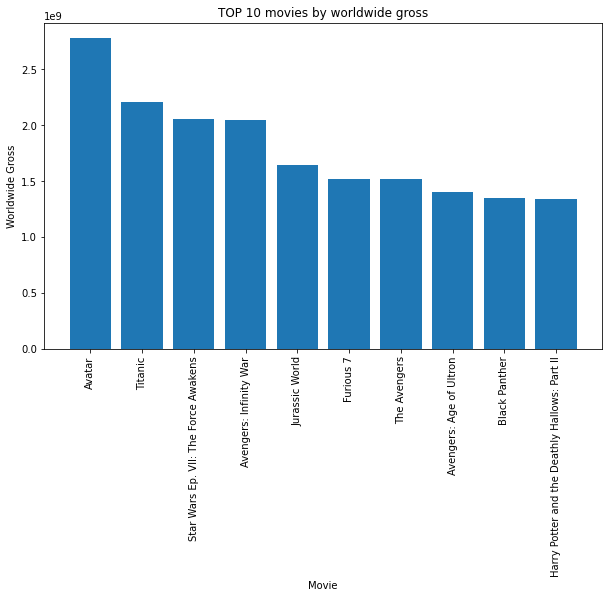

In [103]:
top10 =bbudgets_df.nlargest(10,'worldwide_gross')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.bar(top10['movie'], top10['worldwide_gross'])
plt.xticks(rotation=90)
plt.title('TOP 10 movies by worldwide gross')
plt.xlabel('Movie')
plt.ylabel('Worldwide Gross')
plt.show()

avatar movie has a high world wide gross than the other movies.

to determine which genre is highly watched according to the runtime.

In [95]:
bmovieinfo_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio,box_office_missing
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",14141054.5,104.0,None,True
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,False
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",14141054.5,116.0,None,True
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",14141054.5,128.0,None,True
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,14141054.5,200.0,None,True


In [96]:
#to categorize runtime(short vs long)
def categorize_runtime(runtime):
    if runtime < 90:
        return 'Short'
    elif 90 <= runtime <= 150:
        return 'Medium'
    else:
        return 'Long'

In [98]:
bmovieinfo_df['runtime_category'] = bmovieinfo_df['runtime'].apply(categorize_runtime)
bmovieinfo_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio,box_office_missing,runtime_category
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",14141054.5,104.0,None,True,Medium
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,False,Medium
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",14141054.5,116.0,None,True,Medium
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",14141054.5,128.0,None,True,Medium
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,14141054.5,200.0,None,True,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,None,None,"Aug 18, 2006","Jan 2, 2007",33886034.0,106.0,New Line Cinema,False,Medium
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",14141054.5,88.0,Paramount Vantage,True,Short
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,None,"Jan 1, 1962","May 11, 2004",14141054.5,111.0,None,True,Medium
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",14141054.5,101.0,None,True,Medium


In [118]:
#determine wich runtime groups are most watched per genre
runtime_genre_df = bmovieinfo_df.groupby(['genre', 'runtime_category']).size().reset_index(name='count')
runtime_genre_df.head()

,genre,runtime_category,count
0,Action and Adventure,Medium,14
1,Action and Adventure,Short,5
2,Action and Adventure|Animation|Art House and I...,Medium,1
3,Action and Adventure|Animation|Classics|Comedy...,Medium,1
4,Action and Adventure|Animation|Comedy,Medium,1


In [102]:
#to find the most watched genre
runtime_genre_df.idxmax(axis=1).head(10)

genre
Action and Adventure                                                                             (box_office, Short)
Action and Adventure|Animation|Art House and International|Drama|Science Fiction and Fantasy    (box_office, Medium)
Action and Adventure|Animation|Classics|Comedy|Kids and Family|Musical and Performing Arts      (box_office, Medium)
Action and Adventure|Animation|Comedy                                                           (box_office, Medium)
Action and Adventure|Animation|Comedy|Drama|Kids and Family                                      (box_office, Short)
Action and Adventure|Animation|Comedy|Drama|Kids and Family|Musical and Performing Arts          (box_office, Short)
Action and Adventure|Animation|Comedy|Kids and Family                                           (box_office, Medium)
Action and Adventure|Animation|Comedy|Kids and Family|Science Fiction and Fantasy                (box_office, Short)
Action and Adventure|Animation|Comedy|Science Fiction and 

reginal revenue(market performance)

Revenue yearly trend (domestic vs international)

In [120]:
bbudgets_df['release_date']=pd.to_datetime(bbudgets_df['release_date']) 
bbudgets_df['year']=bbudgets_df['release_date'].dt.year

In [122]:
rev_region=bbudgets_df.groupby('year')[['domestic_gross','worldwide_gross']].mean()
rev_region.head()

,domestic_gross,worldwide_gross
year,,
1915,10000000.0,11000000.0
1916,4000000.0,4000000.0
1920,3000000.0,3000000.0
1925,10000000.0,15500000.0
1927,0.0,0.0


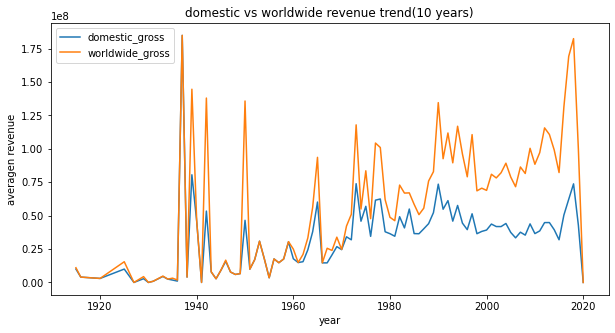

In [123]:
rev_region.plot(figsize=(10,5))
plt.title('domestic vs worldwide revenue trend(10 years)')
plt.ylabel('averagen revenue')
plt.xlabel('year')
plt.show()

this shows that there is growth in the worldwide market compaired to the domestic market.